In [4]:
import pandas as pd
import json
import numpy as np
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import gmaps
from config import gkey

In [5]:
reviews = pd.read_csv("more_reviews_removed_below_1000.csv")
reviews.head()

,Unnamed: 0,Business ID,Review,Compound,Business Name,Business Alias,Category,City,State,ZipCode,Lat,Long,Review Count,Rating
0,0,t7LBdL4HifGJlMbn92WX7g,"If you are looking for a reliable, TRUSTWORTHY...",0.6523,Garretson & Toth,garretson-and-toth-olathe,criminaldefense,Olathe,KS,66061.0,38.881749,-94.819128,3,5.0
1,1,t7LBdL4HifGJlMbn92WX7g,"Tyler is an excellent, knowledgeable, consider...",0.8591,Garretson & Toth,garretson-and-toth-olathe,criminaldefense,Olathe,KS,66061.0,38.881749,-94.819128,3,5.0
2,2,t7LBdL4HifGJlMbn92WX7g,My teenage son has made some pretty typical 's...,-0.5994,Garretson & Toth,garretson-and-toth-olathe,criminaldefense,Olathe,KS,66061.0,38.881749,-94.819128,3,5.0
3,3,XCuOMk5_1L2g8MWA89AnWw,Dustin Crook truly cares about his clients and...,0.8957,Biesterveld & Crook,biesterveld-and-crook-olathe-2,personal_injury,Olathe,KS,66061.0,38.881777,-94.818943,2,5.0
4,4,XCuOMk5_1L2g8MWA89AnWw,"No matter the obstacles, no matter the time th...",0.2006,Biesterveld & Crook,biesterveld-and-crook-olathe-2,personal_injury,Olathe,KS,66061.0,38.881777,-94.818943,2,5.0


In [6]:
category_df = reviews[["Business ID", "Category", "Compound"]]
category_df.head()

,Business ID,Category,Compound
0,t7LBdL4HifGJlMbn92WX7g,criminaldefense,0.6523
1,t7LBdL4HifGJlMbn92WX7g,criminaldefense,0.8591
2,t7LBdL4HifGJlMbn92WX7g,criminaldefense,-0.5994
3,XCuOMk5_1L2g8MWA89AnWw,personal_injury,0.8957
4,XCuOMk5_1L2g8MWA89AnWw,personal_injury,0.2006


In [7]:
compound_df = category_df.groupby("Category").mean().sort_values("Compound")
compound_df.reset_index()
compound_df.head()

,Compound
Category,
personal_injury,0.264369
divorce,0.277964
duilawyers,0.303004
criminaldefense,0.317702
bankruptcy,0.325310


In [8]:
review_df = reviews[["Category", "Business ID", "Review Count"]]
review_count = review_df.groupby(["Business ID"])["Review Count"].unique()
review_count = review_count.str[0]
review_count

review_df = pd.DataFrame(review_count)
review_df = review_df.reset_index()
review_df.head()

,Business ID,Review Count
0,-03IpI8s4LZ9Z-6gHXcTAw,12
1,-0_T6Y1UHTUy4zEtzVckjg,2
2,-0eXQbuEyjPIuw9jsYL-CA,1
3,-0jpGBPIrI1qMg8SscP1yg,1
4,-14hEo2sCi5BjI9yJzWe9A,1


In [9]:
category_df_nocompound = reviews[["Business ID", "Category"]]

merged = category_df_nocompound.merge(review_df, on = "Business ID", how = "outer")
merged = merged.groupby(["Business ID", "Category"])["Review Count"].unique()
merged = merged.str[0]
merged = pd.DataFrame(merged)
merged = merged.groupby("Category").sum()
merged = merged.sort_values("Review Count")

merged.tail(10 )

,Review Count
Category,
realestatelawyers,1411
immigrationlawyers,1418
bankruptcy,1799
duilawyers,2154
criminaldefense,4148
divorce,4232
personal_injury,6942


In [10]:
locations = reviews[["Lat", "Long"]].astype(float)
weight = reviews["Review Count"].astype(float)

In [11]:
# Create a review count Heatmap layer
gmaps.configure(api_key=gkey)

marker_layer = gmaps.symbol_layer(
    locations, fill_color='green', stroke_color='green', scale=2
)
fig2 = gmaps.figure()
fig2.add_layer(marker_layer)
fig2

Figure(layout=FigureLayout(height='420px'))

In [12]:
# Create a review location markers
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

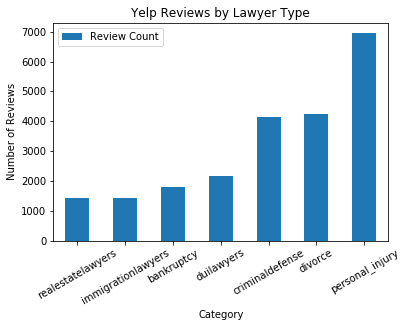

In [26]:
merged.plot(kind = "bar")
plt.title("Yelp Reviews by Lawyer Type")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=30)
plt.savefig("Images/reviews_by_lawyer_type_bar.png", bbox_inches="tight")

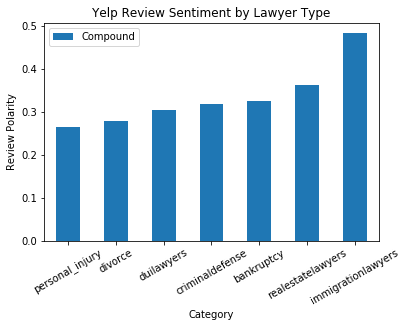

In [27]:
compound_df.plot(kind = "bar")
plt.title("Yelp Review Sentiment by Lawyer Type")
plt.ylabel("Review Polarity")
plt.xticks(rotation=30)
plt.savefig("Images/sentiment_by_type_bar.png", bbox_inches="tight")

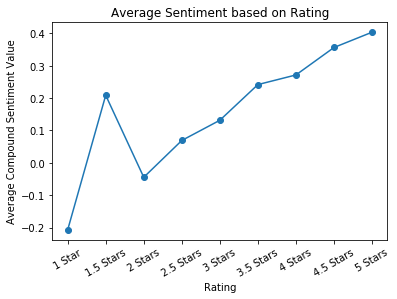

In [15]:
ratings_grouped = reviews.groupby(reviews["Rating"]).mean()

stars = ["1 Star", "1.5 Stars", "2 Stars", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

plt.plot(stars, ratings_grouped["Compound"], marker="o")
plt.xticks(rotation=30)
plt.title("Average Sentiment based on Rating")
plt.xlabel("Rating")
plt.ylabel("Average Compound Sentiment Value")

plt.savefig("Images/sentiment_average.png", bbox_inches="tight")

plt.show()

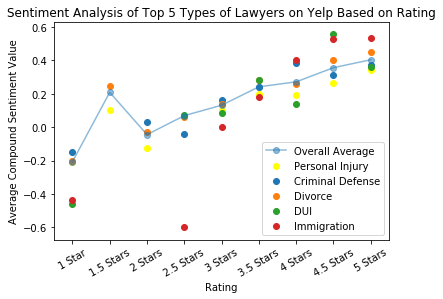

In [16]:
# Personal Injury Lawyers
ratings_personalin = reviews.loc[reviews["Category"] == "personal_injury"]
ratings_grouped_personalin = ratings_personalin.groupby(ratings_personalin["Rating"]).mean()

#Set general x axis values
stars = ["1 Star", "1.5 Stars", "2 Stars", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

#Criminal Defense Lawyers
ratings_crimedef = reviews.loc[reviews["Category"] == "criminaldefense"]
ratings_grouped_crimedef = ratings_crimedef.groupby(ratings_crimedef["Rating"]).mean()

stars_crimedef = ["1 Star", "2 Stars", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

#Divorce Lawyers
ratings_divorce = reviews.loc[reviews["Category"] == "divorce"]
ratings_grouped_divorce = ratings_divorce.groupby(ratings_divorce["Rating"]).mean()

#DUI Lawyers
ratings_dui = reviews.loc[reviews["Category"] == "duilawyers"]
ratings_grouped_dui = ratings_dui.groupby(ratings_dui["Rating"]).mean()

stars_dui = ["1 Star", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

#Immigration Lawyers
ratings_imm = reviews.loc[reviews["Category"] == "immigrationlawyers"]
ratings_grouped_imm = ratings_imm.groupby(ratings_imm["Rating"]).mean()

stars_imm = ["1 Star", "2.5 Stars", "3 Stars", "3.5 Stars", "4 Stars", "4.5 Stars", "5 Stars"]

#Plot
plt.plot(stars, ratings_grouped["Compound"], '-o', alpha=0.5, label="Overall Average")
plt.scatter(stars, ratings_grouped_personalin["Compound"], c="yellow", label="Personal Injury")
plt.scatter(stars_crimedef, ratings_grouped_crimedef["Compound"], label="Criminal Defense")
plt.scatter(stars, ratings_grouped_divorce["Compound"], label="Divorce")
plt.scatter(stars_dui, ratings_grouped_dui["Compound"], label="DUI")
plt.scatter(stars_imm, ratings_grouped_imm["Compound"], label="Immigration")
plt.xticks(rotation=30)
plt.title("Sentiment Analysis of Top 5 Types of Lawyers on Yelp Based on Rating")
plt.legend()
plt.xlabel("Rating")
plt.ylabel("Average Compound Sentiment Value")

plt.savefig("Images/sentiment_analysis_top_5.png", bbox_inches="tight")

plt.show()

In [17]:
file = "more_reviews_removed_below_1000.csv"
file_pd = pd.read_csv(file, encoding="ISO-8859-1")

In [18]:
# group by categories
file_category = file_pd[["Category","Rating","Compound"]]
file_category_1 = file_pd[["Category","Review Count"]]

category_business_count = file_category.groupby(["Category"]).count()
category_mean =  file_category.groupby(["Category"]).mean()
category_review_count = file_category_1.groupby(["Category"]).sum()

merge_table_1 = pd.merge(category_business_count, category_mean, on="Category")
merge_table_2 = pd.merge(merge_table_1, category_review_count, on="Category")
del merge_table_2["Compound_x"]
organized_category = merge_table_2.rename(columns={"Rating_x":"Business Count", 
                                                   "Rating_y":"Average Rating", "Compound_y":"Average Compound"})
organized_category["Average Rating"] = organized_category["Average Rating"].map("{:.2f}".format)
organized_category["Average Compound"] = organized_category["Average Compound"].map("{:.2f}".format)
# del organized_category["Business Count"]
# del organized_category["Review Count"]
organized_category

,Business Count,Average Rating,Average Compound,Review Count
Category,,,,
bankruptcy,741,4.13,0.33,4869
criminaldefense,1001,4.50,0.32,11866
divorce,1920,3.88,0.28,11112
duilawyers,224,4.56,0.30,6384
immigrationlawyers,314,4.70,0.48,4017
personal_injury,1821,4.39,0.26,18314
realestatelawyers,423,4.48,0.36,4062


In [20]:
# group by states
file_state = file_pd[["State","Rating","Compound"]]
file_state_1 = file_pd[["State","Review Count"]]
state_business_count = file_state.groupby(["State"]).count()
state_mean =  file_state.groupby(["State"]).mean()
state_review_count = file_state_1.groupby(["State"]).sum()
merge_table_3 = pd.merge(state_business_count, state_mean, on="State")
merge_table_4 = pd.merge(merge_table_3, state_review_count, on="State")
del merge_table_4["Compound_x"]
organized_state = merge_table_4.rename(columns={"Rating_x":"Business Count", "Rating_y":"Average Rating"
                                               , "Compound_y":"Average Compound"})
organized_state["Average Rating"] = organized_state["Average Rating"].map("{:.2f}".format)
organized_state["Average Compound"] = organized_state["Average Compound"].map("{:.2f}".format)
# del organized_state["Business Count"]
# del organized_state["Review Count"]
# organized_state = organized_state.sort_values["Review Count"]
organized_state.head()

,Business Count,Average Rating,Average Compound,Review Count
State,,,,
AK,12,4.33,0.51,22
AL,62,3.71,0.20,123
AR,26,3.96,0.40,52
AZ,111,4.50,0.31,714
CA,1430,4.65,0.35,36642


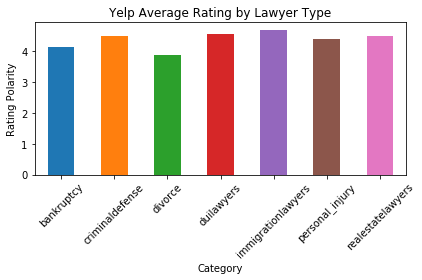

In [21]:
# Chart by category by average rating
organized_category["Average Rating"]=pd.to_numeric(organized_category["Average Rating"])
organized_category.iloc[organized_category["Average Rating"].argsort()]
organized_category["Average Rating"].plot(kind="bar")
plt.title("Yelp Average Rating by Lawyer Type")
plt.ylabel("Rating Polarity")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.figure(figsize=(10, 10))  # width:20, height:3
plt.savefig("Images/rating_by_category1.png")

plt.show()

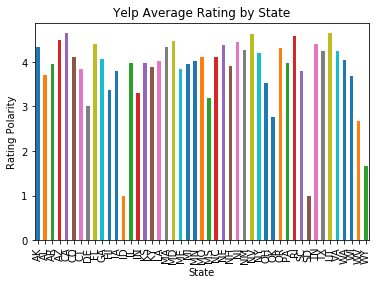

In [22]:
# Chart by state by average rating
organized_state["Average Rating"]=pd.to_numeric(organized_state["Average Rating"])
organized_state["Average Rating"].plot(kind="bar")
plt.title("Yelp Average Rating by State")
plt.ylabel("Rating Polarity")
plt.savefig("Images/rating_by_state1.png")
plt.show()

In [23]:
top_category = organized_category.sort_values("Review Count", ascending=False)
top_category = organized_category.sort_values("Average Compound", ascending=False)
top_category

,Business Count,Average Rating,Average Compound,Review Count
Category,,,,
immigrationlawyers,314,4.70,0.48,4017
realestatelawyers,423,4.48,0.36,4062
bankruptcy,741,4.13,0.33,4869
criminaldefense,1001,4.50,0.32,11866
duilawyers,224,4.56,0.30,6384
divorce,1920,3.88,0.28,11112
personal_injury,1821,4.39,0.26,18314


C:\Users\knkay\anaconda\anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


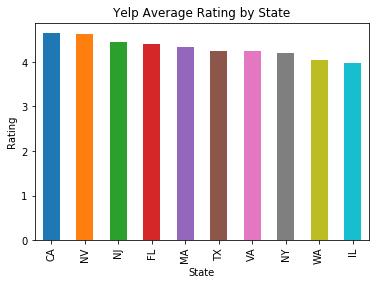

In [24]:
top_state = organized_state.sort_values("Review Count", ascending=False)
top_rating = top_state.head(10)
top_rating["Average Rating"]=pd.to_numeric(top_rating["Average Rating"])
top_rating = top_rating.sort_values("Average Rating", ascending=False)
# top_rating
# top_rating.iloc[top_rating["Average Rating"].argsort()]
top_rating["Average Rating"].plot(kind="bar")
plt.title("Yelp Average Rating by State")
plt.ylabel("Rating")
plt.savefig("Images/top_10_rating.png")
plt.show()


C:\Users\knkay\anaconda\anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


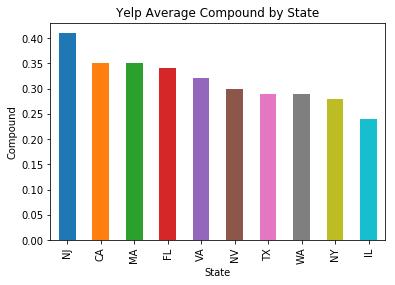

In [25]:
top_state = organized_state.sort_values("Review Count", ascending=False)
top_compound = top_state.head(10)
top_compound["Average Compound"]=pd.to_numeric(top_compound["Average Compound"])
top_compound = top_compound.sort_values("Average Compound", ascending=False)
top_compound["Average Compound"].plot(kind="bar")
plt.title("Yelp Average Compound by State")
plt.ylabel("Compound")
plt.savefig("Images/top_10_compound.png")
plt.show()